In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore')
from matplotlib import pyplot as plt

## Lecture 5: Charts ##

## Scatter Plots

In [ ]:
actors = Table.read_table('actors.csv')
actors

In [ ]:
new_average = np.round(actors.column('Total Gross')/actors.column('Number of Movies'),1)
actors = actors.with_column('New Average', new_average)
actors

In [ ]:
np.sum(actors.column('Average per Movie'))

In [ ]:
np.sum(actors.column('New Average'))

In [ ]:
actors.scatter("Number of Movies","Total Gross")

In [ ]:
actors.scatter("Number of Movies","Average per Movie")

In [ ]:
actors.where('Average per Movie', are.above(400))

In [ ]:

actors.where('Average per Movie', are.below(400)).scatter("Number of Movies","Average per Movie")


In [ ]:
(
actors
     .where('Average per Movie', are.below(400))
     .scatter("Number of Movies","Average per Movie")
)

## Line Graphs ##

In [ ]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies


In [ ]:
movies.plot("Year","Number of Movies")

In [ ]:
movies.where("Year",are.above(2000)).plot("Year","Number of Movies")

In [ ]:
movies.where("Year",are.above(2000)).plot("Year","Total Gross")

In [ ]:
estimated_num_tickets = movies.column(2) * (10 ** 6) / movies.column(1)
movies = movies.with_column('Estimated Tickets', estimated_num_tickets)
movies.set_format('Estimated Tickets', NumberFormatter)
movies

In [ ]:
movies.where("Year",are.above(2000)).plot('Year', 'Estimated Tickets')

## Bar Charts##

In [95]:
top = Table.read_table('top_movies_2017.csv')
top.set_format('Gross', NumberFormatter)
top.set_format('Gross (Adjusted)', NumberFormatter)
top=top.sort('Gross','descending')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista,"936,662,225","961,143,200",2015
Avatar,Fox,"760,507,625","865,082,100",2009
Titanic,Paramount,"658,672,302","1,204,368,000",1997
Jurassic World,Universal,"652,270,625","702,747,400",2015
Marvel's The Avengers,Buena Vista,"623,357,910","683,474,000",2012
The Dark Knight,Warner Brothers,"534,858,444","661,980,500",2008
Rogue One: A Star Wars Story,Buena Vista,"532,177,324","537,326,000",2016
Beauty and the Beast (2017),Buena Vista,"504,014,165","504,014,165",2017
Finding Dory,Buena Vista,"486,295,561","499,245,400",2016
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","802,874,300",1999


In [96]:
studios = top.select('Studio')
studios

Studio
Buena Vista
Fox
Paramount
Universal
Buena Vista
Warner Brothers
Buena Vista
Buena Vista
Buena Vista
Fox


In [103]:
studio_counts = top.group('Studio', sum)
studio_counts

Studio,Title sum,Gross sum,Gross (Adjusted) sum,Year sum
AVCO,,104945305,760778000,1967
Buena Vista,,12370356892,15986095561,70204
Columbia,,860425219,4126215300,17730
Disney,,1100688229,7106396400,21487
Dreamworks,,925432167,1458747900,6003
Fox,,5569320061,14944310800,47607
IFC,,241438208,368219200,2002
Lionsgate,,1169814624,1268645700,6039
MGM,,704168476,5517613900,13743
Metro,,9183673,408214300,1921


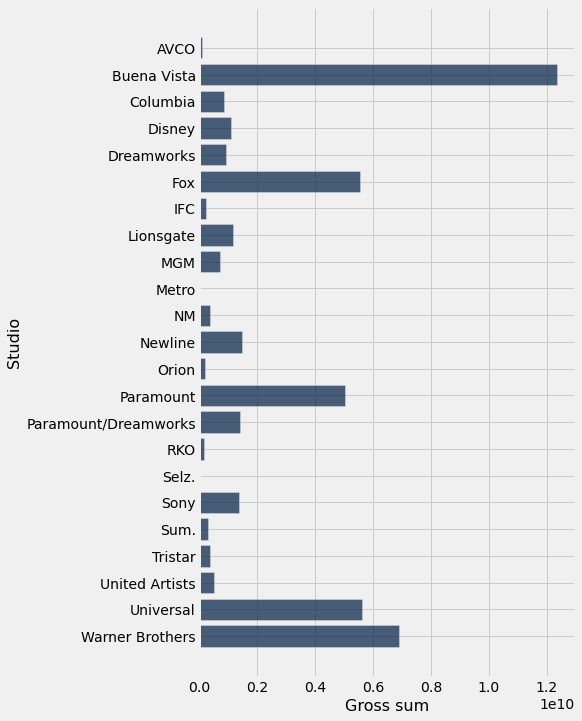

In [104]:
studio_counts.barh('Studio','Gross sum')

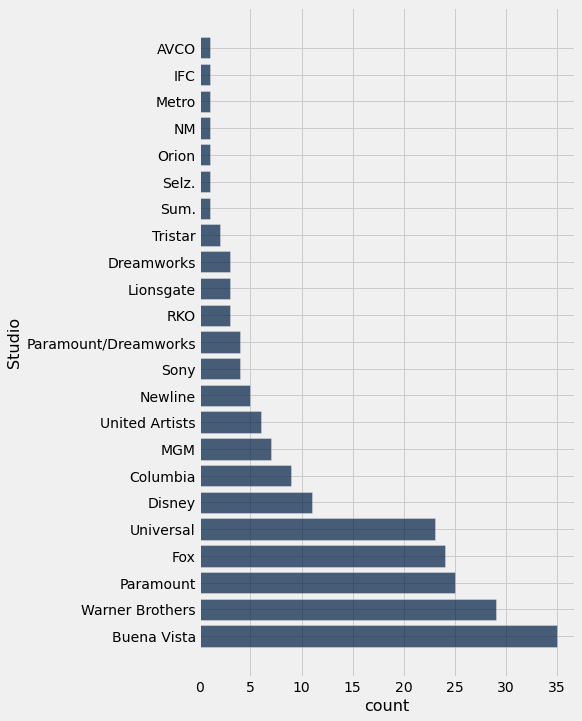

In [101]:
studio_counts.sort('count').barh('Studio', 'count')

In [ ]:
sum(studio_counts.column(1))

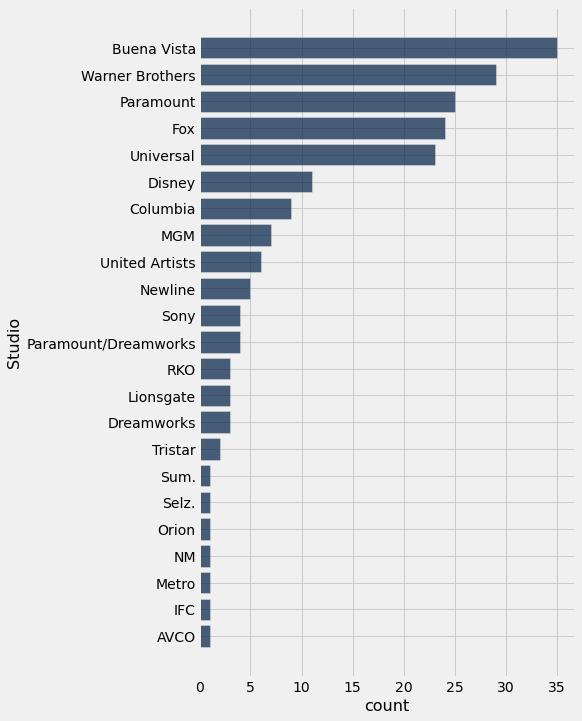

In [102]:
studio_counts.sort(1, descending=True).barh(0)

## Numerical Distribution ##

In [105]:
ages = 2018 - top.column('Year')
top = top.with_column('Age', ages)

In [106]:
top.labels

('Title', 'Studio', 'Gross', 'Gross (Adjusted)', 'Year', 'Age')

In [107]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Star Wars: The Force Awakens,Buena Vista,"936,662,225","961,143,200",2015,3
Avatar,Fox,"760,507,625","865,082,100",2009,9
Titanic,Paramount,"658,672,302","1,204,368,000",1997,21
Jurassic World,Universal,"652,270,625","702,747,400",2015,3
Marvel's The Avengers,Buena Vista,"623,357,910","683,474,000",2012,6
The Dark Knight,Warner Brothers,"534,858,444","661,980,500",2008,10
Rogue One: A Star Wars Story,Buena Vista,"532,177,324","537,326,000",2016,2
Beauty and the Beast (2017),Buena Vista,"504,014,165","504,014,165",2017,1
Finding Dory,Buena Vista,"486,295,561","499,245,400",2016,2
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","802,874,300",1999,19


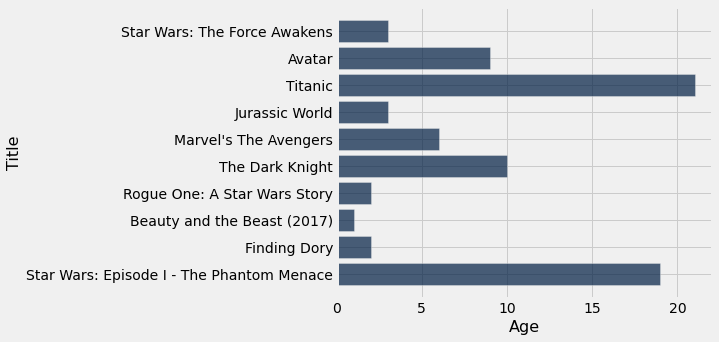

In [108]:
#Bar Chart that shows the age of the top grossing movies
(
    top
    .where('Age', are.below(41))
    .sort('Gross', descending = True)
    .take(range(10))
    .barh('Title', 'Age')
)

## Binning ##

In [ ]:
#Now we want to know about the "distribution" of movie ages

In [109]:
#range
min(ages), max(ages)

(1, 97)

In [119]:
my_uniform_bins = make_array(0, 25, 50, 75, 100)

In [117]:
top.bin('Age', bins = my_uniform_bins)

bin,Age count
0,93
25,66
50,34
75,1
76,0


In [114]:
top.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,93
25,68
50,0


In [120]:
sum(top.bin('Age', bins = my_uniform_bins).column(1))#check that we did not leave out any movies

200

In [121]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 75, 100)

In [122]:
top.bin('Age', bins = my_bins)

bin,Age count
0,21
5,17
10,18
15,37
25,40
40,60
75,7
100,0


In [ ]:
sum(top.bin('Age', bins = my_bins).column(1))

## Histograms ##

In [123]:
my_uniform_bins
top.bin('Age', bins = my_uniform_bins)

bin,Age count
0,93
25,66
50,34
75,7
100,0


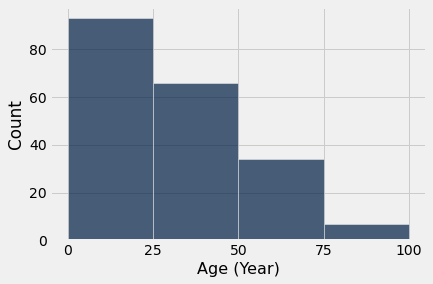

In [126]:
top.hist('Age', bins = my_uniform_bins, unit = 'Year', normed = False)
plt.xticks(my_uniform_bins);

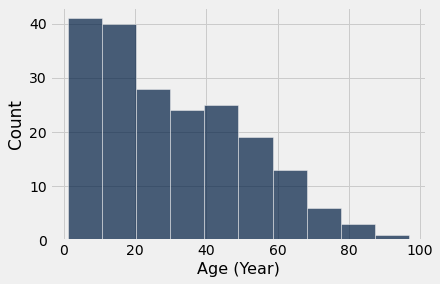

In [127]:
top.hist('Age', unit='Year',normed=False)

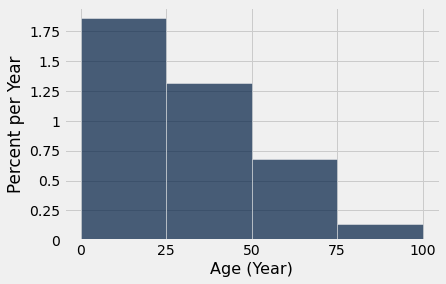

In [128]:
top.hist('Age', bins = my_uniform_bins, unit = 'Year')
plt.xticks(my_uniform_bins);

In [ ]:
top.hist('Age', unit='Year')

In [129]:
25*1.75

43.75

In [ ]:
my_bins

In [ ]:
top.bin('Age', bins = my_bins)

In [ ]:
top.hist('Age', bins = my_bins, unit = 'Year')
plt.xticks(my_bins);

In [ ]:
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)
plt.xticks(my_bins);

In [ ]:
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')
plt.xticks(np.arange(0, 110, 10));

In [ ]:
# 52 out of 200 movies in the [40, 65) bin

percent = (52/200) * 100
percent

In [ ]:
width = 65 - 40
width

In [ ]:
height = percent / width
height